In [44]:
import numpy as np
import pandas as pd
data = pd.read_csv("C:/Users/kkeaa/Downloads/Project-main/Project-main/CENTEL_1522_years.csv")
dt=data
data.drop(data.columns[[0]],axis=1,inplace=True)
window_size = int(len(data)/(8))
splittrain = []
splittest = []
#15-19 18-22
#slicing window
for i in range(0, len(data)-4*window_size,window_size):
   splittrain.append(data[i:i+4*window_size])
   splittest.append(data[i+4*window_size:i+5*window_size])

In [45]:
#weight
from scipy.optimize import NonlinearConstraint, Bounds, LinearConstraint
import sympy as sp
w1=sp.symbols('w1')
w2=sp.symbols('w2')
w3=sp.symbols('w3')
w4=sp.symbols('w4')
w5=sp.symbols('w5')
w6=sp.symbols('w6')
w7=sp.symbols('w7')
w8=sp.symbols('w8')
w9=sp.symbols('w9')
w10=sp.symbols('w10')
td=sp.symbols('td')

In [46]:
def const(p):
    w1,w2,w3,w4,w5,w6,w7,w8,w9,w10 = p
    return w1+w2+w3+w4+w5+w6+w7+w8+w9+w10
nlc = NonlinearConstraint(const, 1 ,1)
import numpy as np
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint, Bounds

bounds = [[0, 1], [0, 1],[0, 1], [0, 1],[0, 1],[0, 1],[0, 1], [0, 1],[0, 1],[0,1]]

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
inertias = []
labels = {}
centers = {}
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(data)
    inertias.append(kmeans.inertia_)
    labels[k] = kmeans.labels_
    centers[k] = kmeans.cluster_centers_

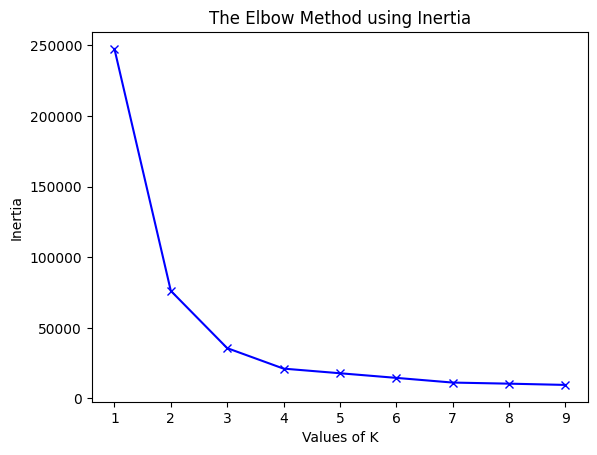

In [48]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [49]:
coll,buy_idx,sell_idx=[],[],[]
decision_d_l=[]
count1,count2,count3=0,0,0
def func(p):
    global S,B,resl,resfl
    S=0
    B=0
    resl=[]
    resfl=[]
    td=0.2
    w1,w2,w3,w4,w5,w6,w7,w8,w9,w10 = p
    mon=100000
    amount=0
    for i in range(0,len(dfo)):
        r = ((w1*sl1[i]+w2*sl2[i]+w3*sl3[i]+w4*sl4[i]+w5*sl5[i]+w6*sl6[i]+w7*sl7[i]+w8*sl8[i]+w9*sl9[i]+w10*sl10[i])/(w1+w2+w3+w4+w5+w6+w7+w8+w9+w10))#w1=sp.symbols('w1')
        if i!=0:
            if dfo['adj_close_price'][i]<dfo['adj_close_price'][i-1]*0.8:
                mon+=amount*dfo['adj_close_price'][i]*0.998
                amount=0
        if r>td:
            sumall=mon//dfo['adj_close_price'][i]
            amount+=sumall
            mon-=sumall*dfo['adj_close_price'][i]*1.002
            B+=1
        elif r<-td:
            mon+=amount*dfo['adj_close_price'][i]*0.998
            amount=0
            S+=1
        else:
            pass
    ret=mon+amount*dfo['adj_close_price'][len(dfo)-1]
    return -((ret-100000)/1000)
def fobj():
    global sl1,sl2,sl3,sl4,sl5,sl6,sl7,sl8,sl9,sl10,dfo,decision_d_l,bh_test_l,bh_train_l,train_l,test_l
    bh_test_l,bh_train_l,train_l,test_l=[],[],[],[]
    for j in range(len(splittrain)):
        dfo=splittrain[j]
        dfo=dfo.reset_index()
        sl1=dfo['volume_prof_signal']
        sl2=dfo['stoch_signal_2']
        sl3=dfo['bb_signal']
        sl4=dfo['cci_signal']
        sl5=dfo['bb_rsi_signal']
        sl6=dfo['renko_adx_signal']
        sl7=dfo['ma50_100_signal']
        sl8=dfo['rsiandmacd']
        sl9=dfo['fake_obv_macd_crossover_signal']
        sl10=dfo['wpr_signal']
        result = differential_evolution(func, bounds,constraints=(nlc),maxiter=1500,popsize=80,recombination=0.8)
        coll.append([result.x,-result.fun,j])
        print([result.x,-result.fun,j])
        train_l.append(-result.fun)
        a=result.x
        b=j
        td=0.2
        w=a[0:10]
        df=splittest[b]
        il=[]
        global count1,count2,count3,sell_idx,buy_idx
        mon=100000
        amount=0
        sumall=0
        df=df.reset_index()
        sl1=dfo['volume_prof_signal']
        sl2=dfo['stoch_signal_2']
        sl3=dfo['bb_signal']
        sl4=dfo['cci_signal']
        sl5=dfo['bb_rsi_signal']
        sl6=dfo['renko_adx_signal']
        sl7=dfo['ma50_100_signal']
        sl8=dfo['rsiandmacd']
        sl9=dfo['fake_obv_macd_crossover_signal']
        sl10=dfo['wpr_signal']

        for i in range(0,len(df)):
            decision_d= ((w[0]*sl1[i]+w[1]*sl2[i]+w[2]*sl3[i]+w[3]*sl4[i]+w[4]*sl5[i]+w[5]*sl6[i]+w[6]*sl7[i]+w[7]*sl8[i]+w[8]*sl9[i]+w[9]*sl10[i])/sum(w))
            if i!=0:
                if df['adj_close_price'][i]<df['adj_close_price'][i-1]*0.8:
                        mon+=amount*df['adj_close_price'][i]*0.998
                        amount=0
                        sell_idx.append(i)
            if decision_d>td:
                sumall=mon//df['adj_close_price'][i]
                amount+=sumall
                mon-=sumall*df['adj_close_price'][i]*1.002
                count1+=1
                buy_idx.append(i)
            elif decision_d<-td:
                mon+=amount*df['adj_close_price'][i]*0.998
                amount=0
                count2+=1
                sell_idx.append(i)
            else:
                count3+=1
            decision_d_l.append(decision_d)
        ret=mon+amount*df['adj_close_price'][len(df)-1]
        stocknum=100000/dfo['adj_close_price'][0]
        bh_test_l.append(((stocknum*(0.998*df['adj_close_price'][len(df)-1])+(100000-stocknum*df['adj_close_price'][0]*1.002))-100000)/1000)
        bh_train_l.append(((stocknum*(0.998*dfo['adj_close_price'][len(dfo)-1])+(100000-stocknum*dfo['adj_close_price'][0]*1.002))-100000)/1000)
        test_l.append((ret-100000)/1000)
        print("B&H_train :",bh_train_l)
        print("ats_train :",train_l)
        print("B&H_test :",bh_test_l)
        print ("ATS test:",b,(ret-100000)/1000)

    print("B&H_train :",bh_train_l)
    print("ats_train :",train_l)
    print("B&H_test :",bh_test_l)
    print("ats_test :",test_l)

In [50]:
fobj()

c:\Users\kkeaa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



[array([0.11784119, 0.06558635, 0.02068441, 0.08493635, 0.58508089,
       0.02780968, 0.02308711, 0.00173262, 0.03384693, 0.03939448]), 98.3370962988357, 0]
B&H_train : [-17.707726366917093]
ats_train : [98.3370962988357]
B&H_test : [3.561435637576156]
ATS test: 0 0.0


c:\Users\kkeaa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



[array([0.02288324, 0.02260935, 0.14357972, 0.16948536, 0.13376254,
       0.05374061, 0.0057    , 0.21866667, 0.0460953 , 0.18347722]), 87.30782365115732, 1]
B&H_train : [-17.707726366917093, 2.147097781812059]
ats_train : [98.3370962988357, 87.30782365115732]
B&H_test : [3.561435637576156, 34.481848604705824]
ATS test: 1 16.698543999999995


c:\Users\kkeaa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



[array([0.00853425, 0.17194009, 0.1361946 , 0.01890062, 0.02157899,
       0.02664405, 0.19319567, 0.05840129, 0.15875537, 0.20585507]), 265.9124709743462, 2]
B&H_train : [-17.707726366917093, 2.147097781812059, 148.56031071288314]
ats_train : [98.3370962988357, 87.30782365115732, 265.9124709743462]
B&H_test : [3.561435637576156, 34.481848604705824, 44.484867015086024]
ATS test: 2 22.857967000000006


c:\Users\kkeaa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



[array([0.03471557, 0.18017898, 0.00120999, 0.01492995, 0.00625652,
       0.29457147, 0.22074907, 0.08875521, 0.13261321, 0.02602002]), 208.6136796965599, 3]
B&H_train : [-17.707726366917093, 2.147097781812059, 148.56031071288314, 130.4488888888889]
ats_train : [98.3370962988357, 87.30782365115732, 265.9124709743462, 208.6136796965599]
B&H_test : [3.561435637576156, 34.481848604705824, 44.484867015086024, -26.428888888888874]
ATS test: 3 -3.7660895000000165


c:\Users\kkeaa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



[array([0.07709772, 0.15829359, 0.02046319, 0.00614489, 0.0828181 ,
       0.33224506, 0.00764355, 0.20488989, 0.04761052, 0.0627935 ]), 94.87947849999999, 4]
B&H_train : [-17.707726366917093, 2.147097781812059, 148.56031071288314, 130.4488888888889, 42.924031007751935]
ats_train : [98.3370962988357, 87.30782365115732, 265.9124709743462, 208.6136796965599, 94.87947849999999]
B&H_test : [3.561435637576156, 34.481848604705824, 44.484867015086024, -26.428888888888874, -0.5860465116279083]
ATS test: 4 0.0
B&H_train : [-17.707726366917093, 2.147097781812059, 148.56031071288314, 130.4488888888889, 42.924031007751935]
ats_train : [98.3370962988357, 87.30782365115732, 265.9124709743462, 208.6136796965599, 94.87947849999999]
B&H_test : [3.561435637576156, 34.481848604705824, 44.484867015086024, -26.428888888888874, -0.5860465116279083]
ats_test : [0.0, 16.698543999999995, 22.857967000000006, -3.7660895000000165, 0.0]


In [51]:
signal = ['volume_prof_signal','stoch_signal_2','bb_signal','cci_signal','bb_rsi_signal','renko_adx_signal','ma50_100_signal','rsiandmacd','fake_obv_macd_crossover_signal','wpr_signal']

In [52]:
#DE prediction
action_list = []
for i in range(0,4*window_size):
    td = 0.2
    value = 0
    for j in range(10):
        value += data[signal[j]][i]*coll[0][0][j]
    if(value>td):
        action_list.append(1)
    elif (value<-td):
        action_list.append(-1)
    else:
        action_list.append(0)
for i in range(4*window_size,5*window_size):
    td = 0.2
    value = 0
    for j in range(10):
        value += data[signal[j]][i]*coll[1][0][j]
    if(value>td):
        action_list.append(1)
    elif (value<-td):
        action_list.append(-1)
    else:
        action_list.append(0)
for i in range(5*window_size,6*window_size):
    td = 0.2
    value = 0
    for j in range(10):
        value += data[signal[j]][i]*coll[2][0][j]
    if(value>td):
        action_list.append(1)
    elif (value<-td):
        action_list.append(-1)
    else:
        action_list.append(0)
for i in range(6*window_size,7*window_size):
    td = 0.2
    value = 0
    for j in range(10):
        value += data[signal[j]][i]*coll[3][0][j]
    if(value>td):
        action_list.append(1)
    elif (value<-td):
        action_list.append(-1)
    else:
        action_list.append(0)
for i in range(7*window_size,8*window_size+2):
    td = 0.2
    value = 0
    for j in range(10):
        value += data[signal[j]][i]*coll[4][0][j]
    if(value>td):
        action_list.append(1)
    elif (value<-td):
        action_list.append(-1)
    else:
        action_list.append(0)

In [53]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[signal], action_list, test_size=0.2, random_state=0)
svm_classifier = SVC(kernel='poly', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
svm_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy poly:{accuracy * 100:.2f}%")

Accuracy poly:96.02%


In [54]:
#LOGISTIC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

model = LogisticRegression()
model.fit(X_train,y_train)
lo_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, lo_pred)
print(f"Accuracy : {accuracy * 100:.2f}%")

Accuracy : 95.58%


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(10):
    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    # Train the classifier on the training set
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    knn_pred = knn_classifier.predict(X_test)

    # Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9646017699115044


In [56]:
#divide data to 4:1
import math
num = math.ceil(len(action_list)/5)
de_pred = action_list[-num:]
stock = data['adj_close_price'][-num:]
stock = stock.reset_index(drop=True)

In [57]:
def calculate(prc,lst,ren,pred,stk,budget):
    for i in range(ren):
        if i == 0 :
            if pred[i] == 1 :
                stk += 1
                prc.append(stock[i])
                lst.append(stock[i]/prc[i]*100)
            elif pred[i] == -1 :
                prc.append(0)
                lst.append(0)
            elif pred[i] == 0 :
                prc.append(0)
                lst.append(0)
        else :
            if pred[i] == 1 :
                stk += 1
                prc.append(prc[i-1]+stock[i])
                lst.append((stk*stock[i]+budget)/prc[i]*100)
            elif pred[i] == -1 :
                if stk > 0 :
                    stk -= 1
                    prc.append(prc[i-1])
                    budget += stock[i]
                    lst.append((stk*stock[i]+budget)/prc[i]*100)
                else :
                    prc.append(prc[i-1])
                    if prc[i] <= 0 :
                        lst.append(lst[i-1])
                    else :
                        lst.append(budget/prc[i]*100)
            elif pred[i] == 0 :
                prc.append(prc[i-1])
                if prc[i] != 0 :
                    lst.append((stk*stock[i]+budget)/prc[i]*100)
                else:
                    lst.append(lst[i-1])
    return prc,lst,budget

In [58]:
#ALL ML AND DE
de_prc , de_lst ,de_bud= calculate([],[],num,de_pred,0,0)
svm_prc , svm_lst,svm_d=bud = calculate([],[],num,svm_pred,0,0)
lo_prc , lo_lst,lo_bud = calculate([],[],num,lo_pred,0,0)
knn_prc , knn_lst , knn_bud = calculate([],[],num,knn_pred,0,0)

In [59]:
#B&H
bh_lst = []
for i in range(num):
    bh_lst.append(stock[i]/stock[0]*100)

In [60]:
import plotly.express as px
px.line(de_lst)

In [61]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, subplot_titles=['DE', 'SVM', 'LO', 'KNN'])

DE = go.Scatter(y=de_lst, mode='lines', name='DE')
SVM = go.Scatter(y=svm_lst, mode='lines', name='SVM')
LO = go.Scatter(y=lo_lst, mode='lines', name='LO')
KNN = go.Scatter(y=knn_lst , mode='lines' , name='KNN')
BH = go.Scatter(y=bh_lst , mode='lines' , name='BH')

fig.add_trace(DE, row=1, col=1)
fig.add_trace(SVM, row=1, col=2)
fig.add_trace(LO, row=2 , col=1)
fig.add_trace(KNN, row=2 , col=2)
fig.add_trace(BH, row=3 , col=1)
fig.update_yaxes(range=[80, 110])

fig.update_layout(title_text='Graph', showlegend=False)

fig.show()


In [62]:
fig = go.Figure([DE , SVM , LO , KNN , BH])
fig.show()

In [63]:
print(f'DE Growth {de_lst[-1]-100} %')
print(f'SVM Growth {svm_lst[-1]-100} %')
print(f'LOGISTIC Growth {lo_lst[-1]-100} %')
print(f'KNN Growth {knn_lst[-1]-100} %')
print(f'BH Growth {bh_lst[-1]-100} %')

DE Growth -2.9036827195467367 %
SVM Growth -6.469002695417785 %
LOGISTIC Growth -100 %
KNN Growth -100 %
BH Growth -1.0471204188481664 %
